In [31]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import plot_components_plotly, plot_plotly

In [35]:
df = pd.read_csv("Temperature Data.csv")
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [36]:
df = df[["DATE","AvgTemp"]]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   AvgTemp  1821 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [38]:
avg_temp=df["AvgTemp"].mean()
avg_temp

46.81878088962109

In [39]:
df.fillna(avg_temp,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   AvgTemp  1825 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [41]:
df["DATE"]=pd.to_datetime(df["DATE"])
df.head()

,DATE,AvgTemp
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


In [42]:
df.columns = ["ds","y"]
df.head()

,ds,y
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


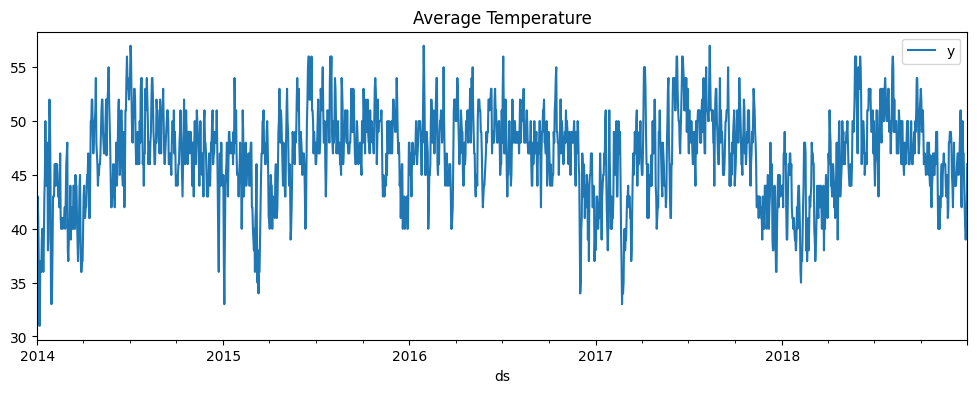

In [43]:
df.plot(x="ds",y="y",figsize=(12,4),title="Average Temperature")
plt.show()

In [44]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [45]:
len(train)

1460

In [46]:
len(test)

365

In [47]:
model = Prophet()

In [48]:
model.fit(train)

12:08:43 - cmdstanpy - INFO - Chain [1] start processing
12:08:43 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
train.tail()

,ds,y
1455,2017-12-26,44.0
1456,2017-12-27,45.0
1457,2017-12-28,43.0
1458,2017-12-29,43.0
1459,2017-12-30,44.0


In [50]:
future_dates = model.make_future_dataframe(periods=365)

In [51]:
forecast = model.predict(future_dates)

In [52]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1820,2018-12-26,46.268723,37.104996,45.931651,44.767639,47.925809,-4.887708,-4.887708,-4.887708,-0.059834,-0.059834,-0.059834,-4.827874,-4.827874,-4.827874,0.0,0.0,0.0,41.381015
1821,2018-12-27,46.268103,37.022690,46.218776,44.761962,47.922958,-4.747623,-4.747623,-4.747623,0.097827,0.097827,0.097827,-4.845449,-4.845449,-4.845449,0.0,0.0,0.0,41.520480
1822,2018-12-28,46.267483,37.673219,46.369919,44.756284,47.921173,-4.408644,-4.408644,-4.408644,0.425980,0.425980,0.425980,-4.834623,-4.834623,-4.834623,0.0,0.0,0.0,41.858839
1823,2018-12-29,46.266863,36.914553,46.217638,44.750606,47.924991,-4.788772,-4.788772,-4.788772,0.006752,0.006752,0.006752,-4.795524,-4.795524,-4.795524,0.0,0.0,0.0,41.478091
1824,2018-12-30,46.266242,36.934257,45.580810,44.744928,47.929470,-4.969109,-4.969109,-4.969109,-0.240352,-0.240352,-0.240352,-4.728758,-4.728758,-4.728758,0.0,0.0,0.0,41.297133


In [60]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,39.254749,35.343286,43.098200
1,2014-01-02,39.574747,35.137180,44.124110
2,2014-01-03,40.085611,35.837634,44.302595
3,2014-01-04,39.866874,35.690717,44.280543
4,2014-01-05,39.835220,35.521994,44.079278
...,...,...,...,...
1820,2018-12-26,41.381015,37.104996,45.931651
1821,2018-12-27,41.520480,37.022690,46.218776
1822,2018-12-28,41.858839,37.673219,46.369919
1823,2018-12-29,41.478091,36.914553,46.217638


In [61]:
plot_plotly(model,forecast)

NameError: name 'go' is not defined

In [62]:
plot_components_plotly(model,forecast)

NameError: name 'go' is not defined

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
pred = forecast.iloc[-365:]["yhat"]
pred

1460    41.643579
1461    41.924529
1462    42.007196
1463    42.261397
1464    42.603750
          ...    
1820    41.381015
1821    41.520480
1822    41.858839
1823    41.478091
1824    41.297133
Name: yhat, Length: 365, dtype: float64

In [58]:
rmse = np.sqrt(mean_squared_error(pred,test["y"]))
rmse

3.458617763904657

In [59]:
test["y"].mean()

46.31183227640992